# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #for testing, decrease this number to 50
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #for testing, decrease this number to 50
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#print(cities)

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL - Use openweather API 2.5
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Unit: standard or imperial
unit = "imperial"

# Define a limit for the number of results (adjust as needed)
limit = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&limit={limit}&appid={weather_api_key}&units={unit}"
    #f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        #print(f"{city} found")
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | puerto baquerizo moreno
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | uvinza
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | sooke
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | chimbote
Processing Record 12 of Set 1 | pasuquin
Processing Record 13 of Set 1 | venice
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | kirakira
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | blackmans bay
Process

In [6]:
print(city_data) #remember to get rid of this cell when pushing the source to prod

[{'City': 'vyazemskiy', 'Lat': 47.5378, 'Lng': 134.7525, 'Max Temp': 290.8, 'Humidity': 42, 'Cloudiness': 1, 'Wind Speed': 5.49, 'Country': 'RU', 'Date': 1697181458}, {'City': 'tafuna', 'Lat': -14.3358, 'Lng': -170.72, 'Max Temp': 301.12, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 7.72, 'Country': 'AS', 'Date': 1697181458}, {'City': 'bir el hafey', 'Lat': 34.9321, 'Lng': 9.1932, 'Max Temp': 295.89, 'Humidity': 35, 'Cloudiness': 0, 'Wind Speed': 1.73, 'Country': 'TN', 'Date': 1697181458}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 277.22, 'Humidity': 96, 'Cloudiness': 52, 'Wind Speed': 2.99, 'Country': 'CL', 'Date': 1697181380}, {'City': 'fuerte olimpo', 'Lat': -21.0415, 'Lng': -57.8738, 'Max Temp': 291.67, 'Humidity': 66, 'Cloudiness': 100, 'Wind Speed': 3.7, 'Country': 'PY', 'Date': 1697181459}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 276.14, 'Humidity': 76, 'Cloudiness': 67, 'Wind Speed': 9.91, 'Country': 'TF', 'Date

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,59.02,80,0,20.71,AR,1697407203
1,puerto baquerizo moreno,-0.9000,-89.6000,81.59,69,40,10.36,EC,1697407088
2,albany,42.6001,-73.9662,53.06,77,100,3.00,US,1697407047
3,uvinza,-5.1036,30.3911,71.46,82,94,6.22,TZ,1697407284
4,bethel,41.3712,-73.4140,56.75,70,97,8.08,US,1697407284


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
# REMEMBER to include the trailing dot for directory travesal
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,59.02,80,0,20.71,AR,1697407203
1,puerto baquerizo moreno,-0.9000,-89.6000,81.59,69,40,10.36,EC,1697407088
2,albany,42.6001,-73.9662,53.06,77,100,3.00,US,1697407047
3,uvinza,-5.1036,30.3911,71.46,82,94,6.22,TZ,1697407284
4,bethel,41.3712,-73.4140,56.75,70,97,8.08,US,1697407284


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
#DATE function here
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

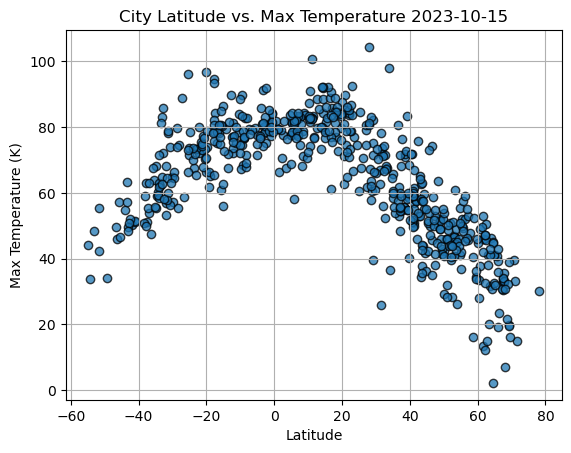

In [11]:
# Build scatter plot for latitude vs. temperature
# Remove the starter code in the cell below before moving to prod
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Add labels and other graph properties
plt.title(f'City Latitude vs. Max Temperature {runDate}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

# Add a grid for better readability
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig1.png")

# Show plot
plt.show()

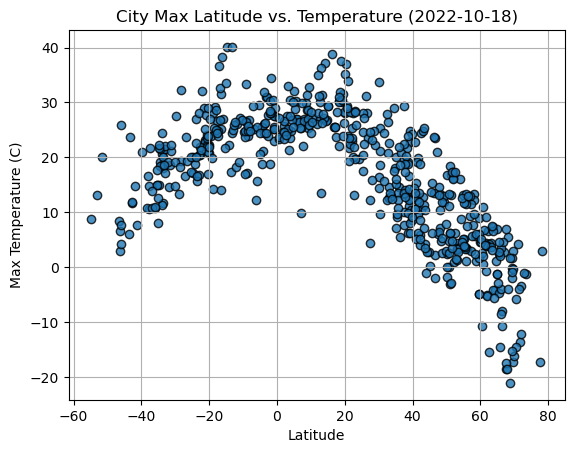

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

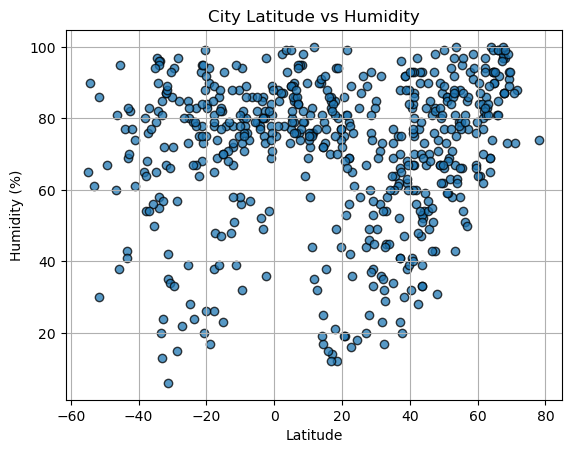

In [12]:
# Scatter plot for latitude vs humidity
# Analysis: Weak correlation. It gets humid everywhere in the world
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties

plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

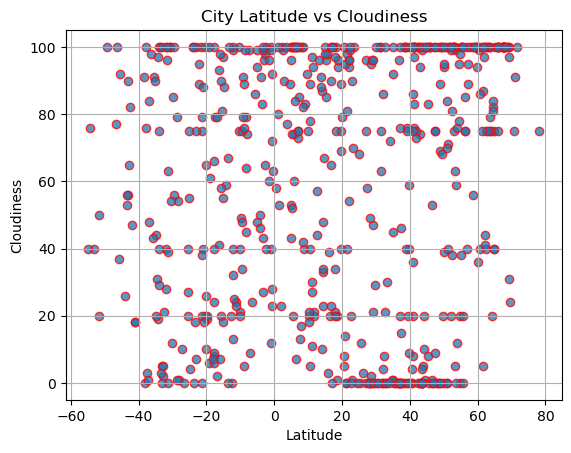

In [13]:
# Scatter plot for latitude vs cloudiness
# Analysis: Weak correlation 
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='red', alpha=0.75)

# Incorporate the other graph properties

plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

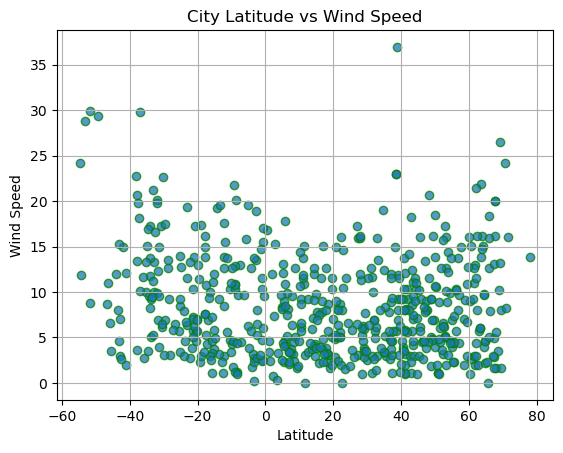

In [14]:
# Scatter plot for latitude vs wind speed
# Analysis: It looks like it's windier up north than south of the Earth
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='green', alpha=0.75)

# Incorporate the other graph properties

plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, regressionEQPlotX, regressionEQPlotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regressionEQPlotX,regressionEQPlotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,53.06,77,100,3.00,US,1697407047
4,bethel,41.3712,-73.4140,56.75,70,97,8.08,US,1697407284
5,nantucket,41.2835,-70.0995,55.02,75,76,12.10,US,1697407284
6,bubaque,11.2833,-15.8333,82.80,83,97,15.05,GW,1697407284
7,sooke,48.3746,-123.7276,63.57,74,100,20.71,CA,1697407285


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,59.02,80,0,20.71,AR,1697407203
1,puerto baquerizo moreno,-0.9000,-89.6000,81.59,69,40,10.36,EC,1697407088
3,uvinza,-5.1036,30.3911,71.46,82,94,6.22,TZ,1697407284
8,ulladulla,-35.3500,150.4667,63.77,50,91,10.00,AU,1697407285
9,adamstown,-25.0660,-130.1015,71.58,80,55,8.46,PN,1697407285


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8567868582730302
y = -0.85x + 91.17


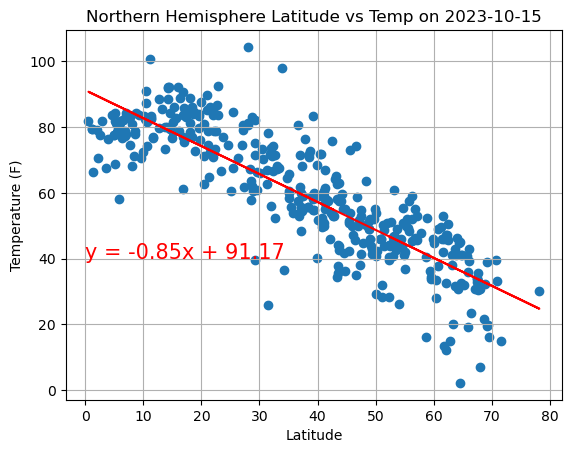

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#y axis label
y_label = "Temperature (F)"

#title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')

#linear regression 
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png
plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')

plt.show()

The r-value is 0.7596440211599903
y = 0.67x + 85.23


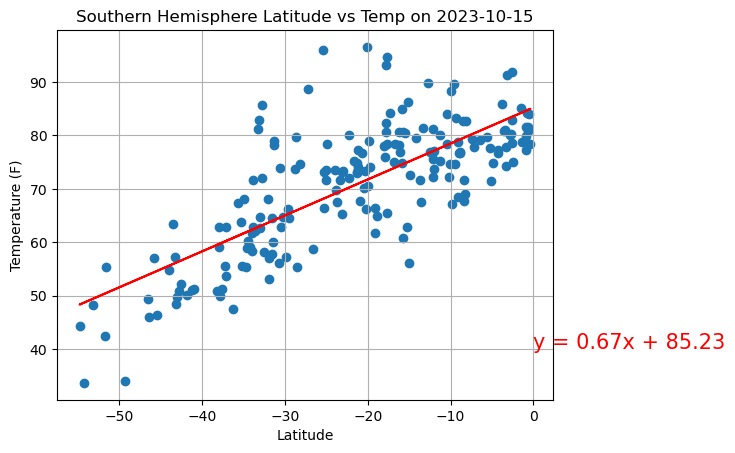

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#y axis label
y_label = "Temperature (F)"

#title
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')

#linear regression 
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png
plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')

plt.show()

The r-value is: 0.4121057168607245


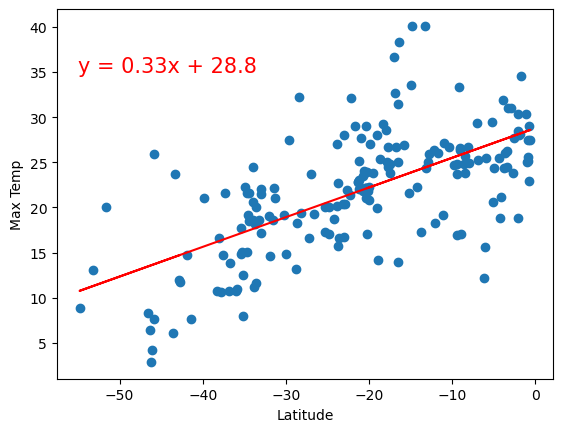

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.15277405377798658
y = 0.16x + 65.7


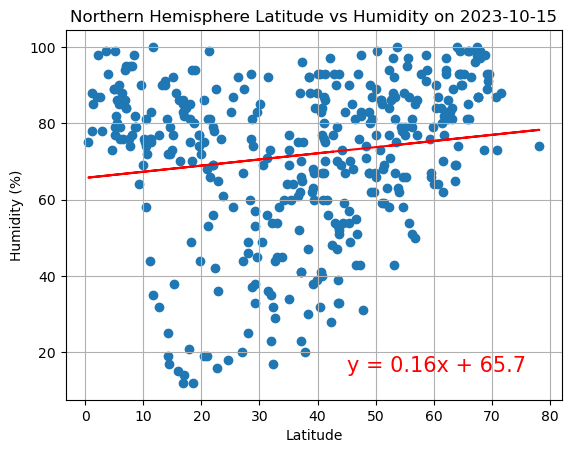

In [20]:
#Northern Hem Humidity v Lat Linear Reg
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 15

y_label = "Humidity (%)"

plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')

plt.show()

The r-value is: 0.05689741545789598


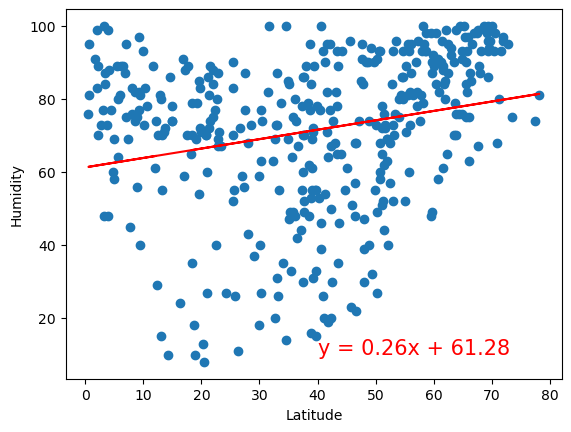

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is 0.1371444351008706
y = 0.21x + 74.69


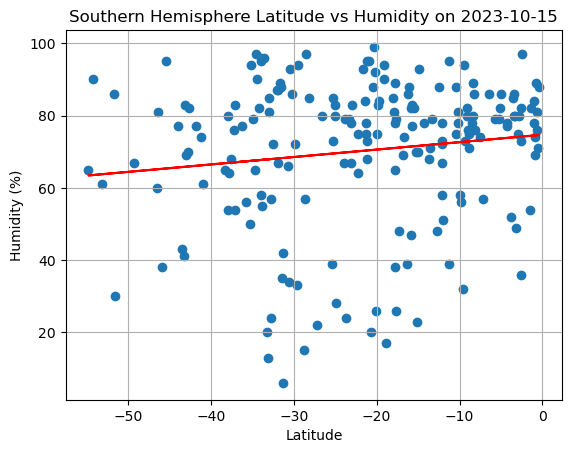

In [21]:
#Southern Hem Humidity v Lat Linear Reg
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 15

y_label = "Humidity (%)"

plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')

plt.show()

The r-value is: 0.0002808747046324607


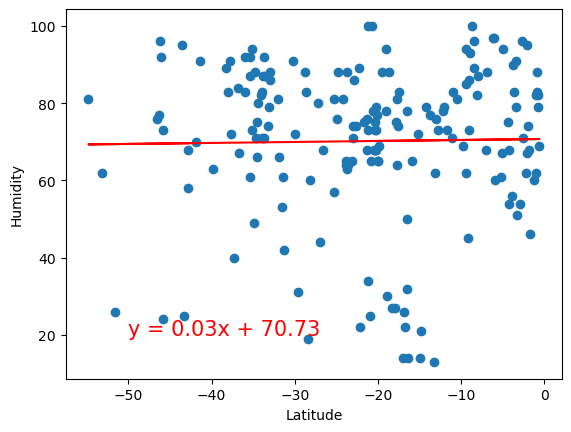

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** 

Humidity in the Nothern and Southern hemisphere do not seem to have any correlation between humidity and the latitude of the cities in the globe.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12768957389954255
y = 0.26x + 50.46


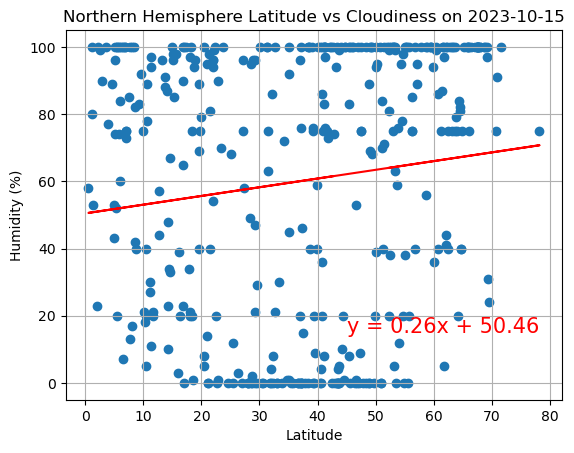

In [22]:
#Northern Hem Cloudiness v Lat Linear Reg
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 45
regEQplotY = 15

y_label = "Humidity (%)"

plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')

plt.show()

The r-value is 0.09054288487335281
y = 0.23x + 59.59


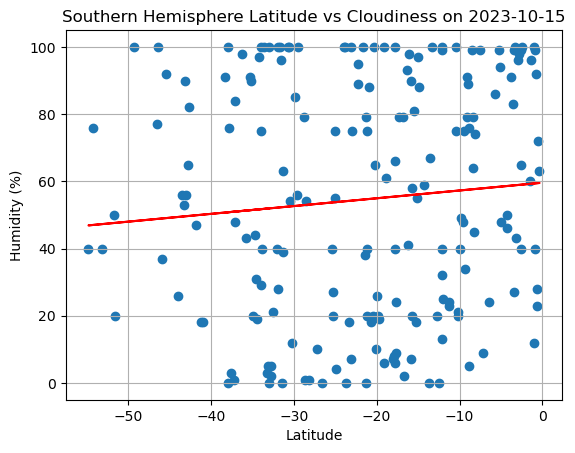

In [23]:
#Southern Hem Cloudiness v Lat Linear Reg
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = 45
regEQplotY = 15

y_label = "Humidity (%)"

plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')

plt.show()

**Discussion about the linear relationship:**

Based on the regression plots above, cloudiness in the Nothern and Southern Hemisphere do not seem to have any correlation at all regarding which hemisphere has more clouds/less clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.16129720570068648
y = 0.04x + 6.11


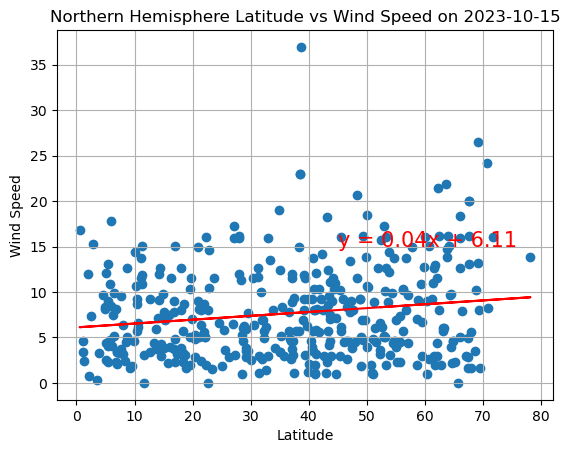

In [24]:
#Northern Hem Wind Speed v Lat Linear Reg
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 45
regEQplotY = 15

y_label = "Wind Speed"

plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')

plt.show()

The r-value is -0.2914247084474486
y = -0.13x + 6.84


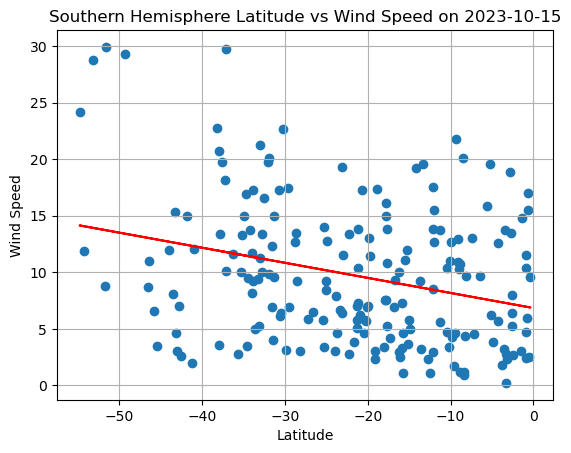

In [25]:
#Southern Hem Wind Speed v Lat Linear Reg
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regEQplotX = 45
regEQplotY = 15

y_label = "Wind Speed"

plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'./output_data/Northern Southern Latitude vs Wind Speed on {runDate}.png')

plt.show()

**Discussion about the linear relationship:**

It mightbe that the southern hemisphere is LESS windy in concentrated latitude than the north, but it's really hard to tell.